<a href="https://colab.research.google.com/github/slanucha/deep_learning_colab/blob/master/Long_Distance_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

Dataset

In [20]:
T = 20
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # get_label(x, -1, -2, -3)
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

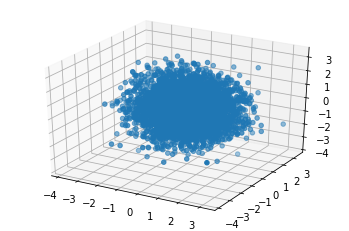

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2])

In [25]:
inputs = np.expand_dims(X, -1)

i = Input(shape=(T, D))
x = LSTM(5, return_sequences=True)(i) # SimpleRNN(5)(i)
x = tf.keras.layers.GlobalMaxPool1D()(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
r = model.fit(inputs, Y, epochs=200, validation_split=0.5)

Epoch 1/200
79/79 [==============================] - 1s 14ms/step - loss: 0.6940 - accuracy: 0.5040 - val_loss: 0.6945 - val_accuracy: 0.4896
Epoch 2/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6927 - accuracy: 0.5172 - val_loss: 0.6952 - val_accuracy: 0.4944
Epoch 3/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6927 - accuracy: 0.5164 - val_loss: 0.6985 - val_accuracy: 0.4944
Epoch 4/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6930 - accuracy: 0.5148 - val_loss: 0.6946 - val_accuracy: 0.4940
Epoch 5/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6923 - accuracy: 0.5216 - val_loss: 0.6959 - val_accuracy: 0.4944
Epoch 6/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6925 - accuracy: 0.5116 - val_loss: 0.6978 - val_accuracy: 0.4944
Epoch 7/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6925 - accuracy: 0.5204 - val_loss: 0.6946 - val_accuracy: 0.4936
Epoch 8/200


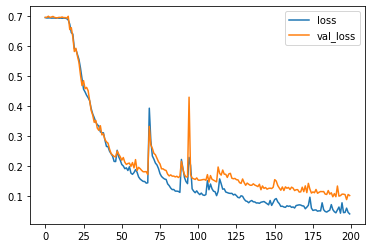

In [26]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

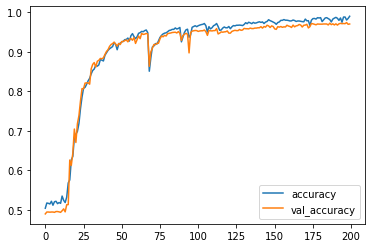

In [27]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()